In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM, GRU
from keras.models import Sequential

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


ImportError: Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\ProgramData\Anaconda3\lib\imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "C:\ProgramData\Anaconda3\lib\imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: The specified module could not be found.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [52]:
def parser(x):
    return datetime.strptime(x, '%d-%b-%Y')

nifty_data = pd.read_csv('./ml-project-data/NIFTY-50/2014.csv', header=0, 
                                                              parse_dates=[0], index_col=0, squeeze=True, 
                                                              date_parser=parser)

scaler = MinMaxScaler(feature_range=(-1, 1))
nifty_data['Average'] = nifty_data.loc[: , "High":"Low"].mean(axis=1)
nifty = scaler.fit_transform(nifty_data[['Average', 'Shares Traded', 'Turnover (Rs. Cr)']])
nifty_data

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Average
Date,,,,,,,
2014-01-01,6323.80,6327.20,6298.25,6301.65,69567668,2015.36,6312.725
2014-01-02,6301.25,6358.30,6211.30,6221.15,158132556,5249.79,6284.800
2014-01-03,6194.55,6221.70,6171.25,6211.15,139043889,5369.42,6196.475
2014-01-06,6220.85,6224.70,6170.25,6191.45,118344976,4722.67,6197.475
2014-01-07,6203.90,6221.50,6144.75,6162.25,138559000,5696.60,6183.125
2014-01-08,6178.05,6192.10,6160.35,6174.60,146912639,5816.54,6176.225
2014-01-09,6181.70,6188.05,6148.25,6168.35,150064466,5908.02,6168.150
2014-01-10,6178.85,6239.10,6139.60,6171.45,159920407,7347.29,6189.350
2014-01-13,6189.55,6288.20,6189.55,6272.75,135009945,5984.02,6238.875


In [25]:
tcs_data = pd.read_csv('./ml-project-data/TCS/01-01-2014-TO-31-12-2014TCSEQN.csv')
tcs = scaler.fit_transform(tcs_data[['Average Price', 'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty']])

In [26]:
infy_data = pd.read_csv('./ml-project-data/INFY/01-01-2014-TO-31-12-2014INFYEQN.csv')
infy = scaler.fit_transform(infy_data[['Average Price', 'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty']])

In [27]:
hcl_data = pd.read_csv('./ml-project-data/HCL/01-01-2014-TO-31-12-2014HCLTECHEQN.csv')
hcl = scaler.fit_transform(hcl_data[['Average Price', 'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty']])

In [28]:
techm_data = pd.read_csv('./ml-project-data/TECHM/01-01-2014-TO-31-12-2014TECHMEQN.csv')
techm = scaler.fit_transform(techm_data[['Average Price', 'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty']])

In [29]:
wipro_data = pd.read_csv('./ml-project-data/WIPRO/01-01-2014-TO-31-12-2014WIPROEQN.csv')
wipro = scaler.fit_transform(wipro_data[['Average Price', 'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty']])

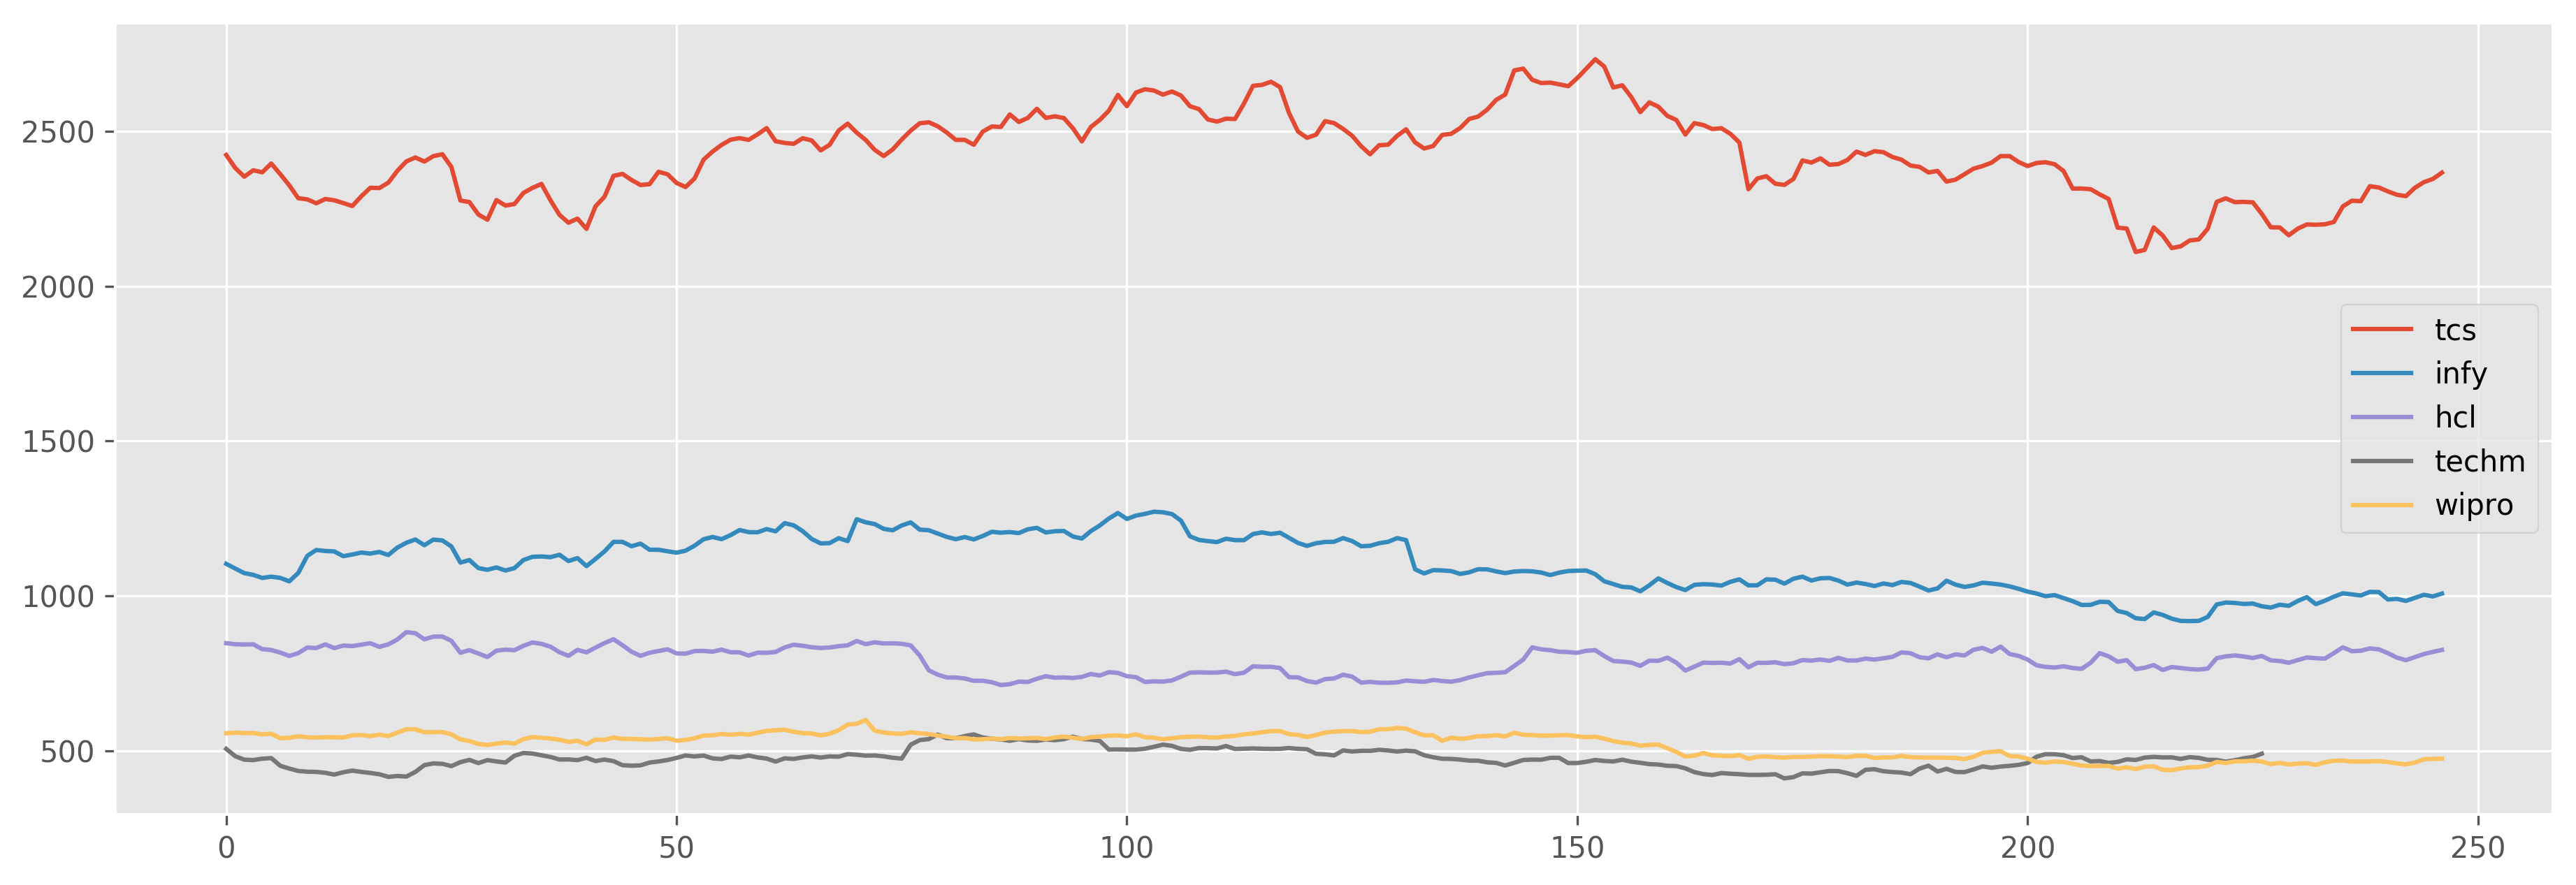

In [39]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 5), dpi=300)
# plt.plot(nifty_data['Average'], label="nifty")
plt.plot(tcs_data['Average Price'], label="tcs")
plt.plot(infy_data['Average Price'], label="infy")
plt.plot(hcl_data['Average Price'], label="hcl")
plt.plot(techm_data['Average Price'], label="techm")
plt.plot(wipro_data['Average Price'], label="wipro")
plt.legend(loc='best')
plt.show()

In [40]:
nifty_data = pd.read_csv('./ml-project-data/NIFTY-50/2016.csv')
scaler = MinMaxScaler(feature_range=(0, 1))
nifty_data['Average'] = nifty_data.loc[: , "High":"Low"].mean(axis=1)
nifty = scaler.fit_transform(nifty_data[['Average', 'Shares Traded', 'Turnover (Rs. Cr)']])
tcs_data = pd.read_csv('./ml-project-data/TCS/01-01-2016-TO-31-12-2016TCSEQN.csv')
tcs = scaler.fit_transform(tcs_data[['Average Price', 'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty']])
infy_data = pd.read_csv('./ml-project-data/INFY/01-01-2016-TO-31-12-2016INFYEQN.csv')
infy = scaler.fit_transform(infy_data[['Average Price', 'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty']])
hcl_data = pd.read_csv('./ml-project-data/HCL/01-01-2016-TO-31-12-2016HCLTECHEQN.csv')
hcl = scaler.fit_transform(hcl_data[['Average Price', 'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty']])
techm_data = pd.read_csv('./ml-project-data/TECHM/01-01-2016-TO-31-12-2016TECHMEQN.csv')
techm = scaler.fit_transform(techm_data[['Average Price', 'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty']])
wipro_data = pd.read_csv('./ml-project-data/WIPRO/01-01-2016-TO-31-12-2016WIPROEQN.csv')
wipro = scaler.fit_transform(wipro_data[['Average Price', 'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty']])

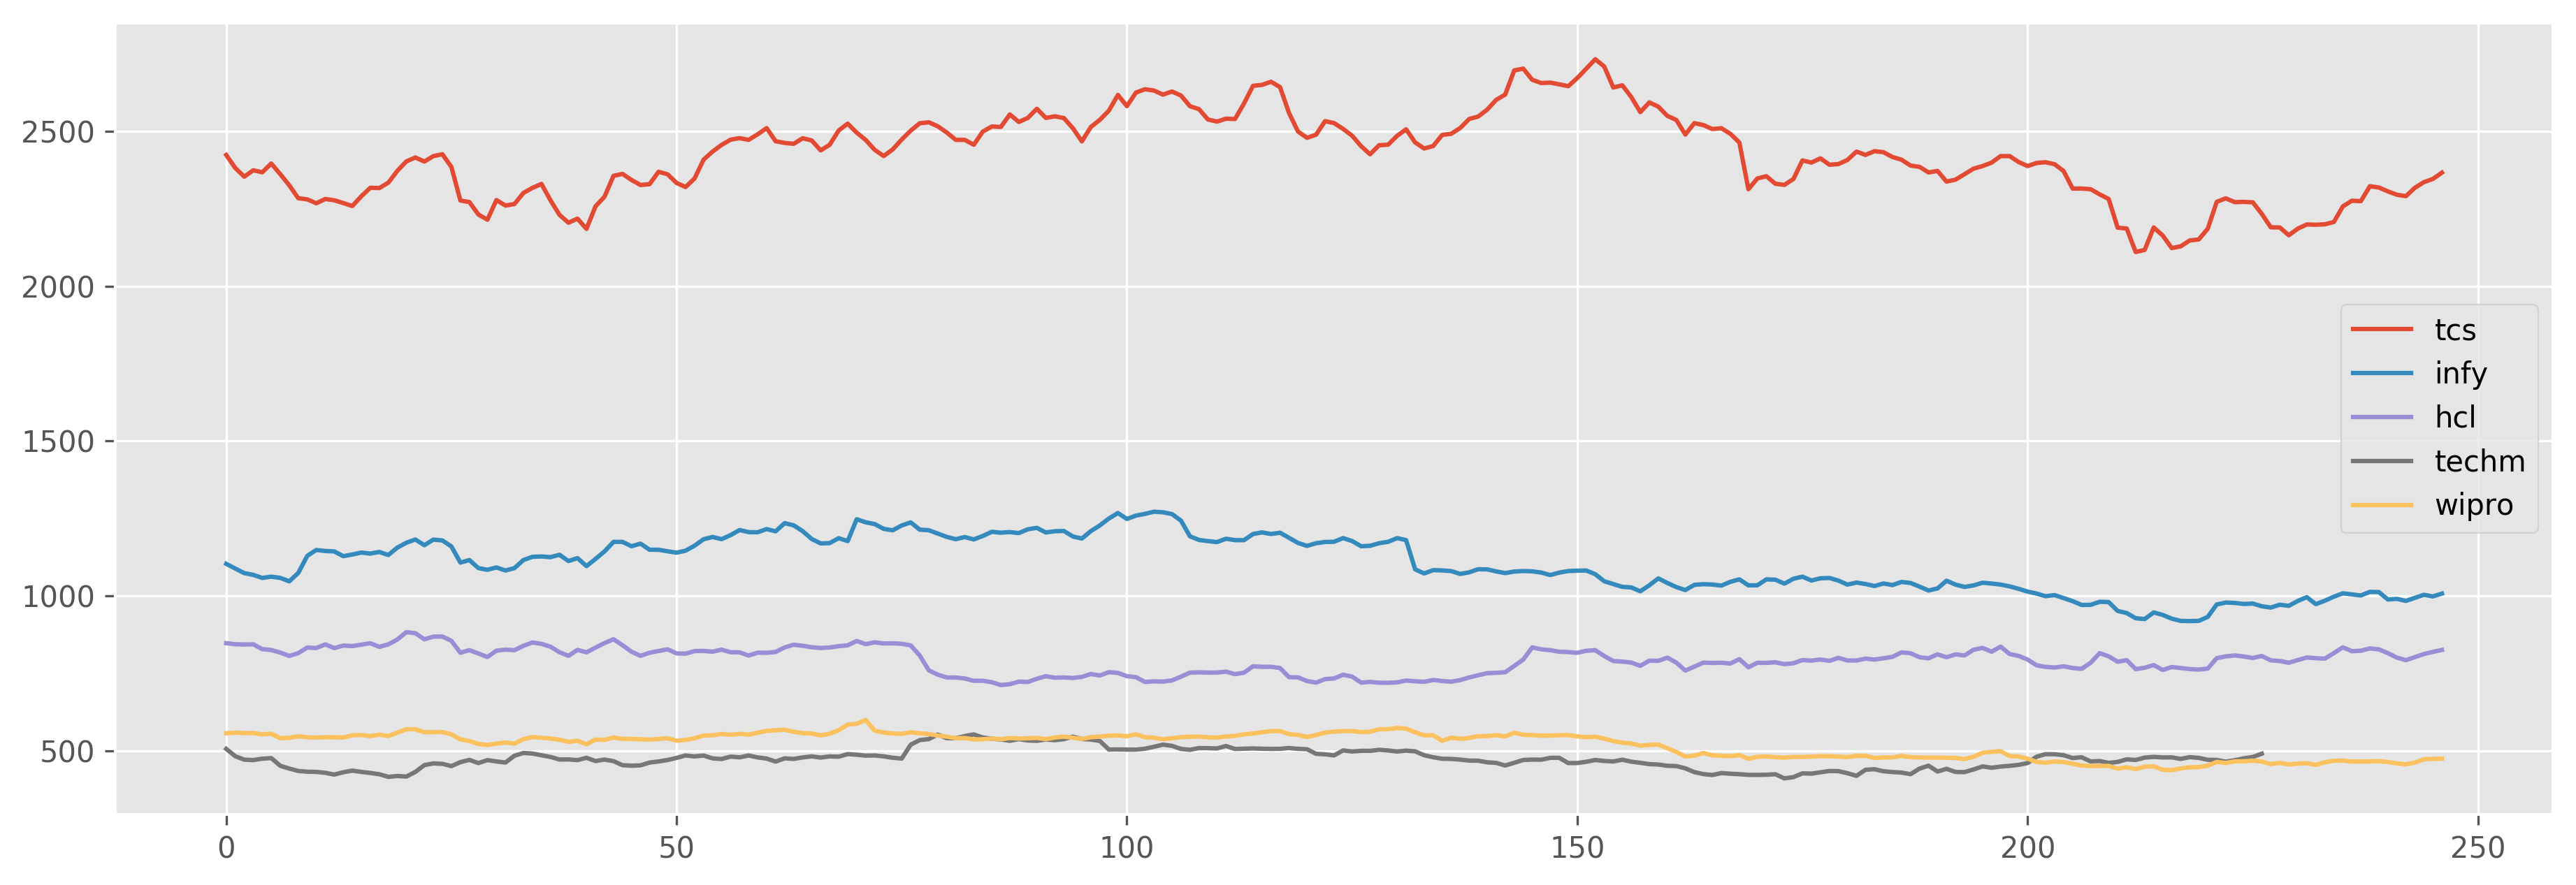

In [41]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 5), dpi=300)
# plt.plot(nifty_data['Average'], label="nifty")
plt.plot(tcs_data['Average Price'], label="tcs")
plt.plot(infy_data['Average Price'], label="infy")
plt.plot(hcl_data['Average Price'], label="hcl")
plt.plot(techm_data['Average Price'], label="techm")
plt.plot(wipro_data['Average Price'], label="wipro")
plt.legend(loc='best')
plt.show()

In [42]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
#     rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        
    print(dfoutput)

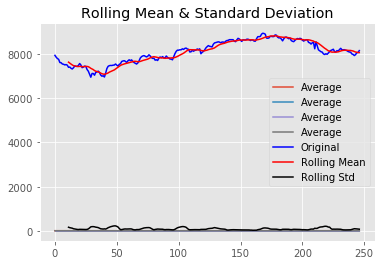

Results of Dickey-Fuller Test:
Test Statistic                  -1.091809
p-value                          0.718327
#Lags Used                       0.000000
Number of Observations Used    246.000000
Critical Value (1%)             -3.457215
Critical Value (5%)             -2.873362
Critical Value (10%)            -2.573070
dtype: float64


0      7941.175
1      7859.325
2      7797.225
3      7761.075
4      7615.775
5      7607.575
6      7549.725
7      7538.050
8      7508.375
9      7524.300
10     7496.900
11     7400.025
12     7413.450
13     7356.200
14     7324.350
15     7380.500
16     7454.175
17     7448.800
18     7439.225
19     7489.225
20     7570.850
21     7502.175
22     7384.850
23     7411.500
24     7454.900
25     7437.875
26     7299.300
27     7224.800
28     7084.300
29     6951.900
         ...   
217    8009.425
218    7978.600
219    8014.150
220    7988.700
221    8049.500
222    8106.500
223    8163.025
224    8186.750
225    8217.925
226    8114.675
227    8099.375
228    8154.775
229    8133.975
230    8204.000
231    8258.450
232    8192.550
233    8192.325
234    8197.250
235    8173.925
236    8153.075
237    8113.675
238    8093.425
239    8082.900
240    8005.700
241    7982.325
242    7931.925
243    7974.175
244    8064.475
245    8065.950
246    8155.875
Name: Average, Length: 2

In [51]:
test_stationarity(nifty_data['Average'])
nifty_data['Average']

In [50]:
nifty_avg_log = np.log(nifty_data['Average'])
plt.plot(nifty_avg_log)
nifty_avg_log

0      8.979817
1      8.969456
2      8.961523
3      8.956876
4      8.937977
5      8.936900
6      8.929266
7      8.927719
8      8.923774
9      8.925893
10     8.922245
11     8.909239
12     8.911051
13     8.903299
14     8.898960
15     8.906597
16     8.916530
17     8.915808
18     8.914522
19     8.921221
20     8.932061
21     8.922948
22     8.907186
23     8.910788
24     8.916627
25     8.914340
26     8.895534
27     8.885275
28     8.865636
29     8.846770
         ...   
217    8.988374
218    8.984518
219    8.988964
220    8.985783
221    8.993365
222    9.000421
223    9.007370
224    9.010272
225    9.014073
226    9.001429
227    8.999542
228    9.006359
229    9.003805
230    9.012377
231    9.018992
232    9.010980
233    9.010953
234    9.011554
235    9.008704
236    9.006150
237    9.001306
238    8.998807
239    8.997506
240    8.987909
241    8.984985
242    8.978651
243    8.983963
244    8.995224
245    8.995407
246    9.006494
Name: Average, Length: 2

In [49]:
nifty_avg_log_diff = nifty_avg_log - nifty_avg_log.shift()
plt.plot(nifty_avg_log_diff)
nifty_avg_log_diff

0           NaN
1     -0.010361
2     -0.007933
3     -0.004647
4     -0.018899
5     -0.001077
6     -0.007633
7     -0.001548
8     -0.003944
9      0.002119
10    -0.003648
11    -0.013006
12     0.001813
13    -0.007752
14    -0.004339
15     0.007637
16     0.009933
17    -0.000721
18    -0.001286
19     0.006699
20     0.010840
21    -0.009112
22    -0.015762
23     0.003602
24     0.005839
25    -0.002286
26    -0.018807
27    -0.010259
28    -0.019638
29    -0.018866
         ...   
217   -0.009840
218   -0.003856
219    0.004446
220   -0.003181
221    0.007582
222    0.007056
223    0.006949
224    0.002902
225    0.003801
226   -0.012644
227   -0.001887
228    0.006817
229   -0.002554
230    0.008572
231    0.006615
232   -0.008012
233   -0.000027
234    0.000601
235   -0.002850
236   -0.002554
237   -0.004844
238   -0.002499
239   -0.001301
240   -0.009597
241   -0.002924
242   -0.006334
243    0.005312
244    0.011260
245    0.000183
246    0.011087
Name: Average, Length: 2

In [48]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(nifty_avg_log, order=(5, 1, 2))  
results_ARIMA = model.fit(disp=-1)
plt.figure(figsize=(15, 5), dpi=300)
plt.plot(nifty_avg_log_diff, color='blue')
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-nifty_avg_log_diff)**2))

ValueError: Given a pandas object and the index does not contain dates

In [46]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

NameError: name 'results_ARIMA' is not defined

In [161]:
nifty_data

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Average
0,01-Jan-2016,7938.45,7972.55,7909.80,7963.20,64843836,2613.91,7941.175
1,04-Jan-2016,7924.55,7937.55,7781.10,7791.30,138864905,5897.08,7859.325
2,05-Jan-2016,7828.40,7831.20,7763.25,7784.65,149672973,5948.51,7797.225
3,06-Jan-2016,7788.05,7800.95,7721.20,7741.00,151715828,6722.17,7761.075
4,07-Jan-2016,7673.35,7674.95,7556.60,7568.30,194732861,7803.21,7615.775
5,08-Jan-2016,7611.65,7634.10,7581.05,7601.35,162348690,6753.57,7607.575
6,11-Jan-2016,7527.45,7605.10,7494.35,7563.85,194836791,7327.15,7549.725
7,12-Jan-2016,7587.20,7588.30,7487.80,7510.30,168975973,7071.48,7538.050
8,13-Jan-2016,7557.90,7590.95,7425.80,7562.40,221908258,9585.17,7508.375
9,14-Jan-2016,7467.40,7604.80,7443.80,7536.80,206988549,9246.75,7524.300
